In [1]:
import pandas as pd

# Reading the data
Data is read from csv files. Data has been previously cleaned and suited for machine learning applications, so we can focus strictly on testing different algorithms.

In [2]:
X = pd.read_csv("../data/ready_to_ML_data.csv")
y = pd.read_csv("../data/labels.csv")
y = y.shaded_percent.to_frame()

# Input data

In [3]:
X.head()

,cycleway,living_street,motorway,motorway_link,path,primary,primary_link,residential,secondary,secondary_link,...,busway,drive-through,driveway,emergency_access,parking_aisle,no.8,yes.6,length,x,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.021978,0.527629,0.612320
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.055314,0.624064,0.118376
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.025500,0.620614,0.459645
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.142379,0.630571,0.472040
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.043169,0.663437,0.433393


# Labeled data

In [4]:
y.head()

,shaded_percent
0,0.00000
1,0.00000
2,0.19462
3,0.00000
4,0.00000


# Splitting the data

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [6]:
test_results_df = pd.DataFrame(y_test)
test_results_df.head()

,shaded_percent
1808,0.000000
405,0.000000
3515,0.000000
19216,0.021949
18540,0.000000


#  Testing different models
## Linear regression
Starting off with the most basic example of regression we train linear regression model and plot the result as the 2d scatter of proper and predicted values.
Perfect plot should only have points on the diagonal.

In [7]:
from sklearn.linear_model import LinearRegression
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)
test_results_df['linear_regression'] = linear_regression_model.predict(X_test)

In [8]:
import matplotlib.pyplot as plt
def visualize_models_accuracy(model_name):
    mse = ((test_results_df['shaded_percent'] - test_results_df[model_name])**2).sum()
    plt.title(f"MSE of {model_name} = {mse}")
    plt.scatter(test_results_df['shaded_percent'],test_results_df[model_name], s=0.3)
    plt.xlabel("proper value")
    plt.ylabel("predicted value")
    plt.show()

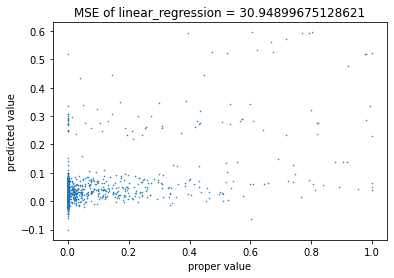

In [9]:
visualize_models_accuracy('linear_regression')

## KNRegression

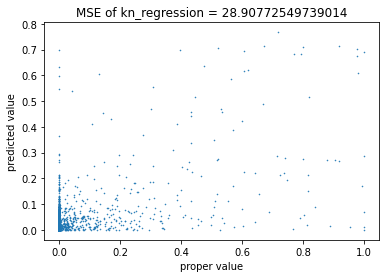

In [10]:
from sklearn.neighbors import KNeighborsRegressor
kn_regression_model = KNeighborsRegressor(n_neighbors=20)
kn_regression_model.fit(X_train, y_train)
test_results_df['kn_regression'] = kn_regression_model.predict(X_test)
visualize_models_accuracy('kn_regression')

## Decision Tree Regression

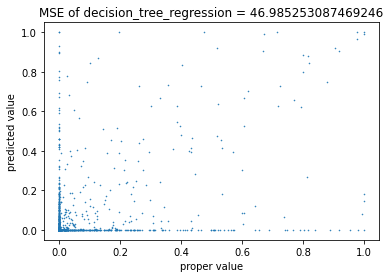

In [11]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_regressor = DecisionTreeRegressor()
decision_tree_regressor.fit(X_train, y_train)
test_results_df['decision_tree_regression'] = decision_tree_regressor.predict(X_test)
visualize_models_accuracy('decision_tree_regression')

## Random Forest Regression

C:\Users\JF\AppData\Local\Temp\ipykernel_10000\4224963035.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_regressor.fit(X_train, y_train)


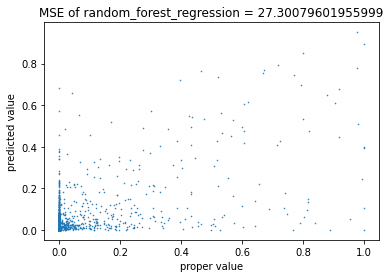

In [12]:
from sklearn.ensemble import RandomForestRegressor
random_forest_regressor = RandomForestRegressor()
random_forest_regressor.fit(X_train, y_train)
test_results_df['random_forest_regression'] = random_forest_regressor.predict(X_test)
visualize_models_accuracy('random_forest_regression')

## Simple Neural Network

C:\Users\JF\.conda\envs\DataEngineering\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


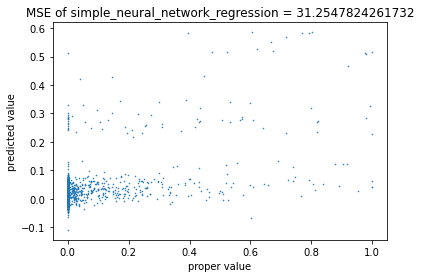

In [13]:
from sklearn.neural_network import MLPRegressor
simple_neural_network = MLPRegressor(activation="logistic")
simple_neural_network.fit(X_train, y_train)
test_results_df['simple_neural_network_regression'] = simple_neural_network.predict(X_test)
visualize_models_accuracy('simple_neural_network_regression')

## Deep neural network

In [14]:
from tensorflow.keras import Sequential, layers
nn = Sequential(
    [
        layers.InputLayer(input_shape=(X_train.shape[1:])),
        layers.Dense(500, activation="relu"),
        layers.Dense(50, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ]
)

In [15]:
nn.compile(optimizer="Adam", loss="mse")
nn.fit(X_train, y_train, epochs=10)

Epoch 1/10
608/608 [==============================] - 1s 2ms/step - loss: 0.0161
Epoch 2/10
608/608 [==============================] - 1s 2ms/step - loss: 0.0138
Epoch 3/10
608/608 [==============================] - 1s 988us/step - loss: 0.0136
Epoch 4/10
608/608 [==============================] - 1s 1ms/step - loss: 0.0134
Epoch 5/10
608/608 [==============================] - 1s 989us/step - loss: 0.0133
Epoch 6/10
608/608 [==============================] - 1s 1ms/step - loss: 0.0131
Epoch 7/10
608/608 [==============================] - 1s 954us/step - loss: 0.0129
Epoch 8/10
608/608 [==============================] - 1s 955us/step - loss: 0.0128
Epoch 9/10
608/608 [==============================] - 1s 915us/step - loss: 0.0127
Epoch 10/10
608/608 [==============================] - 1s 948us/step - loss: 0.0126


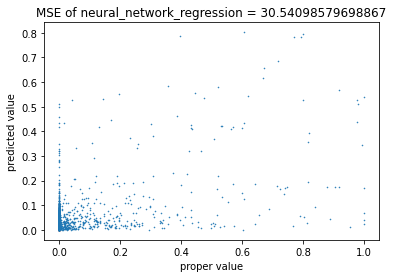

In [16]:
test_results_df['neural_network_regression'] = nn.predict(X_test)
visualize_models_accuracy('neural_network_regression')

# Summary
As we can see on the plots and the MSE values above, none of the models did well. However, the decision the tree model has the lowest MSE. We state that it is because the data is contradictory. Streets with the same properties could have different shading.
The winner is the random forest that divided data into samples, and that caused every single sub-tree (of the random forest) to have less contradictions to process.

It also might be because forests are 100% shaded by trees :)